## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import RobustScaler
from collections import Counter
from wordcloud import WordCloud
import requests
import os
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
import warnings

# Suppress warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

In [ ]:
# Define the path 
eda_data = pd.read_csv(
    "C:\\Users\\shiri\\OneDrive\\Documents\\Python\\ml-projects\\data-606\\pharmaceutical-drug-price-prediction\\data\\interim\\drug_amp_dataset.csv"
)

## Basic Exploration

In [ ]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726104 entries, 0 to 726103
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_group               726104 non-null  int64  
 1   ingredient                  726104 non-null  object 
 2   strength                    726104 non-null  object 
 3   dosage                      726104 non-null  object 
 4   route                       726104 non-null  object 
 5   mdr_unit_type               726104 non-null  object 
 6   weighted_average_of_amps    726104 non-null  float64
 7   aca_ful                     726104 non-null  float64
 8   package_size                726104 non-null  float64
 9   ndc                         726104 non-null  object 
 10  year                        726104 non-null  int64  
 11  month                       726104 non-null  int64  
 12  strength_num                726104 non-null  float64
 13  strength_ratio

In [ ]:
print("Drug Data Shape:", eda_data.shape)

Drug Data Shape: (726104, 23)


In [ ]:
# Print column names for drug_data DataFrame
print(eda_data.columns)

Index(['product_group', 'ingredient', 'strength', 'dosage', 'route',
       'mdr_unit_type', 'weighted_average_of_amps', 'aca_ful', 'package_size',
       'ndc', 'year', 'month', 'strength_num', 'strength_ratio', 'gnrc_name',
       'tot_mftr', 'tot_spndng', 'tot_clms', 'tot_benes', 'tot_dsg_unts',
       'avg_spnd_per_dsg_unt_wghtd', 'avg_spnd_per_clm', 'avg_spnd_per_bene'],
      dtype='object')


In [ ]:
eda_data.head(5)

,product_group,ingredient,strength,dosage,route,mdr_unit_type,weighted_average_of_amps,aca_ful,package_size,ndc,...,strength_ratio,gnrc_name,tot_mftr,tot_spndng,tot_clms,tot_benes,tot_dsg_unts,avg_spnd_per_dsg_unt_wghtd,avg_spnd_per_clm,avg_spnd_per_bene
0,3867,irbesartan/hydrochlorothiazide,150-12.5mg,tablet,oral,tab,0.260389,0.455681,30.0,00024-5855-30,...,0.5,irbesartan/hydrochlorothiazide,8,20170502.59,592499.0,145787.0,44197753.0,4.5255,312.2,1318.07
1,3867,irbesartan/hydrochlorothiazide,150-12.5mg,tablet,oral,tab,0.260389,0.455681,30.0,00054-0254-13,...,0.5,irbesartan/hydrochlorothiazide,8,20170502.59,592499.0,145787.0,44197753.0,4.5255,312.2,1318.07
2,3867,irbesartan/hydrochlorothiazide,150-12.5mg,tablet,oral,tab,0.260389,0.455681,90.0,00054-0254-22,...,0.5,irbesartan/hydrochlorothiazide,8,20170502.59,592499.0,145787.0,44197753.0,4.5255,312.2,1318.07
3,3867,irbesartan/hydrochlorothiazide,150-12.5mg,tablet,oral,tab,0.260389,0.455681,30.0,00093-8238-56,...,0.5,irbesartan/hydrochlorothiazide,8,20170502.59,592499.0,145787.0,44197753.0,4.5255,312.2,1318.07
4,3867,irbesartan/hydrochlorothiazide,150-12.5mg,tablet,oral,tab,0.260389,0.455681,90.0,00093-8238-98,...,0.5,irbesartan/hydrochlorothiazide,8,20170502.59,592499.0,145787.0,44197753.0,4.5255,312.2,1318.07


In [ ]:
eda_data.tail(5)

,product_group,ingredient,strength,dosage,route,mdr_unit_type,weighted_average_of_amps,aca_ful,package_size,ndc,...,strength_ratio,gnrc_name,tot_mftr,tot_spndng,tot_clms,tot_benes,tot_dsg_unts,avg_spnd_per_dsg_unt_wghtd,avg_spnd_per_clm,avg_spnd_per_bene
726099,6722,zolmitriptan,2.5 mg,tab rapdis,oral,tab,2.114478,3.72262,6.0,68382-0715-86,...,0.5,zolmitriptan,15,15667865.0,62409.0,15199.0,790525.0,37.1458,399.4,1631.36
726100,6722,zolmitriptan,2.5 mg,tab rapdis,oral,tab,2.114478,3.72262,6.0,68462-0499-76,...,0.5,zolmitriptan,15,15667865.0,62409.0,15199.0,790525.0,37.1458,399.4,1631.36
726101,6722,zolmitriptan,2.5 mg,tab rapdis,oral,tab,2.114478,3.72262,6.0,64980-0256-16,...,0.5,zolmitriptan,15,15667865.0,62409.0,15199.0,790525.0,37.1458,399.4,1631.36
726102,6722,zolmitriptan,2.5 mg,tab rapdis,oral,tab,2.114478,3.72262,6.0,00115-0691-51,...,0.5,zolmitriptan,15,15667865.0,62409.0,15199.0,790525.0,37.1458,399.4,1631.36
726103,6722,zolmitriptan,2.5 mg,tab rapdis,oral,tab,2.114478,3.72262,6.0,64896-0691-51,...,0.5,zolmitriptan,15,15667865.0,62409.0,15199.0,790525.0,37.1458,399.4,1631.36


In [ ]:
# Print the count of unique values for each column in drug_data
eda_data.nunique()

,0
product_group,1147
ingredient,415
strength,335
dosage,86
route,13
mdr_unit_type,7
weighted_average_of_amps,48725
aca_ful,45888
package_size,114
ndc,32903


In [ ]:
eda_data.describe()

,product_group,weighted_average_of_amps,aca_ful,package_size,year,month,strength_num,strength_ratio,tot_mftr,tot_spndng,tot_clms,tot_benes,tot_dsg_unts,avg_spnd_per_dsg_unt_wghtd,avg_spnd_per_clm,avg_spnd_per_bene
count,726104.000000,726104.000000,726104.000000,726104.000000,726104.000000,726104.000000,726104.000000,726096.000000,726104.000000,7.261040e+05,7.261040e+05,7.261040e+05,7.261040e+05,726104.000000,726104.000000,726104.000000
mean,3575.053681,0.857494,1.645218,232.342068,2020.033994,6.507006,215.278363,0.622247,19.212654,1.872013e+08,7.903999e+06,1.943819e+06,6.024716e+08,24.285449,560.452185,2870.806567
std,2902.203658,4.234840,7.836936,624.948862,1.416738,3.457542,7114.319079,0.333438,10.987704,2.289446e+08,1.184177e+07,2.821795e+06,1.000564e+09,85.848703,991.996530,6710.774144
min,32.000000,0.000114,0.006410,1.000000,2018.000000,1.000000,0.000000,0.000457,1.000000,2.754130e+03,5.900000e+01,1.700000e+01,2.397000e+03,0.010400,2.860000,5.610000
25%,1679.000000,0.050649,0.105191,30.000000,2019.000000,4.000000,6.250000,0.333333,11.000000,3.942318e+07,5.084370e+05,1.300750e+05,2.844817e+07,2.143100,149.950000,596.940000
50%,2645.000000,0.122551,0.261480,100.000000,2020.000000,7.000000,25.000000,0.500000,17.000000,9.954846e+07,3.371394e+06,6.746780e+05,1.723725e+08,5.138000,345.770000,1362.750000
75%,4659.000000,0.387036,0.786476,100.000000,2021.000000,10.000000,125.000000,1.000000,25.000000,2.463672e+08,8.673425e+06,2.258064e+06,5.506630e+08,11.370800,705.950000,3190.600000
max,13927.000000,120.181186,210.317076,28000.000000,2022.000000,12.000000,500000.000000,1.000000,67.000000,1.533957e+09,6.483012e+07,1.589476e+07,4.884920e+09,863.736300,14701.250000,118393.140000


## Data Cleaning

### Missing values

In [ ]:
# Drug Data Missing Values Summary
missing_summary = pd.DataFrame(
    {
        "Column Name": eda_data.columns,
        "Null or NaN Values": eda_data.isnull().sum(),  # Count of NaN/null values
        "Blank Spaces": (eda_data == "").sum(),  # Count of blank spaces
        "Total Missing": eda_data.isnull().sum() + (eda_data == "").sum(),  # Total missing (NaN + blank spaces)
    }
)

# Print the summary
missing_summary

,Column Name,Null or NaN Values,Blank Spaces,Total Missing
product_group,product_group,0,0,0
ingredient,ingredient,0,0,0
strength,strength,0,0,0
dosage,dosage,0,0,0
route,route,0,0,0
mdr_unit_type,mdr_unit_type,0,0,0
weighted_average_of_amps,weighted_average_of_amps,0,0,0
aca_ful,aca_ful,0,0,0
package_size,package_size,0,0,0
ndc,ndc,0,0,0


The dataset has no missing values in any of the columns.

### Data Types

In [ ]:
print(eda_data.dtypes, "\n")

product_group                   int64
ingredient                     object
strength                       object
dosage                         object
route                          object
mdr_unit_type                  object
weighted_average_of_amps      float64
aca_ful                       float64
package_size                  float64
ndc                            object
year                            int64
month                           int64
strength_num                  float64
strength_ratio                float64
gnrc_name                      object
tot_mftr                        int64
tot_spndng                    float64
tot_clms                      float64
tot_benes                     float64
tot_dsg_unts                  float64
avg_spnd_per_dsg_unt_wghtd    float64
avg_spnd_per_clm              float64
avg_spnd_per_bene             float64
dtype: object 



### Duplicate Rows

In [ ]:
print(f"Number of duplicate rows in drug_data: {eda_data.duplicated().sum()}")

Number of duplicate rows in drug_data: 4


In [ ]:
# To display the head of the duplicate rows
duplicate_rows = eda_data[eda_data.duplicated()]
duplicate_rows.head()

,product_group,ingredient,strength,dosage,route,mdr_unit_type,weighted_average_of_amps,aca_ful,package_size,ndc,...,strength_ratio,gnrc_name,tot_mftr,tot_spndng,tot_clms,tot_benes,tot_dsg_unts,avg_spnd_per_dsg_unt_wghtd,avg_spnd_per_clm,avg_spnd_per_bene
53755,2869,carbamazepine,400mg,"tablet, extended release",oral,tab,1.375235,2.406661,100.0,71930-0074-12,...,1.00,carbamazepine,26,1.716916e+08,1411772.0,237116.0,208143561.0,2.1380,286.90,1946.42
53801,3262,carbamazepine,100 mg,tab er 12h,oral,tab,0.408808,0.715414,100.0,71930-0072-12,...,0.25,carbamazepine,26,1.716916e+08,1411772.0,237116.0,208143561.0,2.1380,286.90,1946.42
53812,3263,carbamazepine,200 mg,tab er 12h,oral,tab,0.672132,1.176231,100.0,71930-0073-12,...,0.50,carbamazepine,26,1.716916e+08,1411772.0,237116.0,208143561.0,2.1380,286.90,1946.42
405781,9154,sulfamethoxazole/trimethoprim,200-40mg/5,oral susp,oral,ml,0.025975,0.055880,473.0,62559-0550-16,...,1.00,sulfamethoxazole/trimethoprim,16,2.590652e+07,4554464.0,3041039.0,94117164.0,1.4467,40.32,56.22


These rows are not essentially duplicate rows. Although `gnrc_name` is same, these drug substances differ in `strength`.

### Remove inconsistencies

The `drug_dataset` contains **yearly drug spending data**, while the `amp_dataset` has **monthly drug pricing data**. To align these datasets for analysis, we **convert the annual data to monthly** by dividing totals by 12. This ensures accurate comparisons and consistent metrics across both datasets.


In [ ]:
# Convert annual totals to monthly
eda_data["tot_spndng"] = eda_data["tot_spndng"] / 12
eda_data["tot_dsg_unts"] = eda_data["tot_dsg_unts"] / 12
eda_data["tot_clms"] = eda_data["tot_clms"] / 12
eda_data["tot_benes"] = eda_data["tot_benes"] / 12

# Recalculate average spending metrics
eda_data["avg_spnd_per_dsg_unt_wghtd"] = eda_data["tot_spndng"] / eda_data["tot_dsg_unts"]
eda_data["avg_spnd_per_clm"] = eda_data["tot_spndng"] / eda_data["tot_clms"]
eda_data["avg_spnd_per_bene"] = eda_data["tot_spndng"] / eda_data["tot_benes"]

# Round values
eda_data["tot_clms"] = eda_data["tot_clms"].round(0)
eda_data["tot_benes"] = eda_data["tot_benes"].round(0)
eda_data["tot_dsg_unts"] = eda_data["tot_dsg_unts"].round(0)

eda_data["tot_spndng"] = eda_data["tot_spndng"].round(4)
eda_data["avg_spnd_per_dsg_unt_wghtd"] = eda_data["avg_spnd_per_dsg_unt_wghtd"].round(4)
eda_data["avg_spnd_per_clm"] = eda_data["avg_spnd_per_clm"].round(4)
eda_data["avg_spnd_per_bene"] = eda_data["avg_spnd_per_bene"].round(4)

## Exploratory Data Analysis

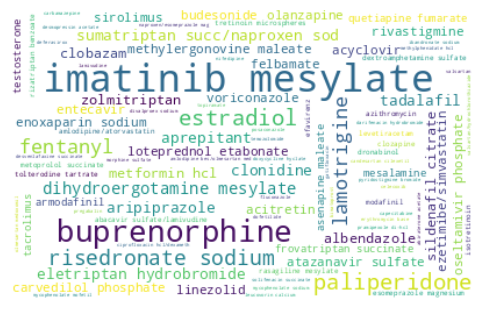

In [ ]:
# Aggregate total manufacturing count for each generic name over 5 years
generic_counts = eda_data.groupby("gnrc_name")["weighted_average_of_amps"].sum().dropna()

# Convert the counts to a dictionary for word cloud weighting
generic_freq_dict = generic_counts.to_dict()

# Generate the word cloud for 'gnrc_name' based on manufacturing count
generic_wordcloud = WordCloud(
    width=400,
    height=250,
    background_color="white",
    colormap="viridis",
).generate_from_frequencies(generic_freq_dict)

# Plot the word cloud for 'gnrc_name'
plt.figure(figsize=(6, 4))
plt.imshow(generic_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Drugs like Imatinib Mesylate and Buprenorphine appear to have higher production levels, likely because they are important in treating serious health issues. Their high demand and specialized manufacturing processes may contribute to higher costs.

For instance, **Imatinib Mesylate** is used in cancer treatments, which makes it a critical drug.

### Understand Distribution of Each Feature

In [ ]:
# List of continuous columns to plot
columns_to_plot = [
    "weighted_average_of_amps",
    "aca_ful",
    "tot_spndng",
    "tot_dsg_unts",
    "tot_clms",
    "tot_benes",
    "avg_spnd_per_dsg_unt_wghtd",
    "avg_spnd_per_clm",
    "avg_spnd_per_bene",
]

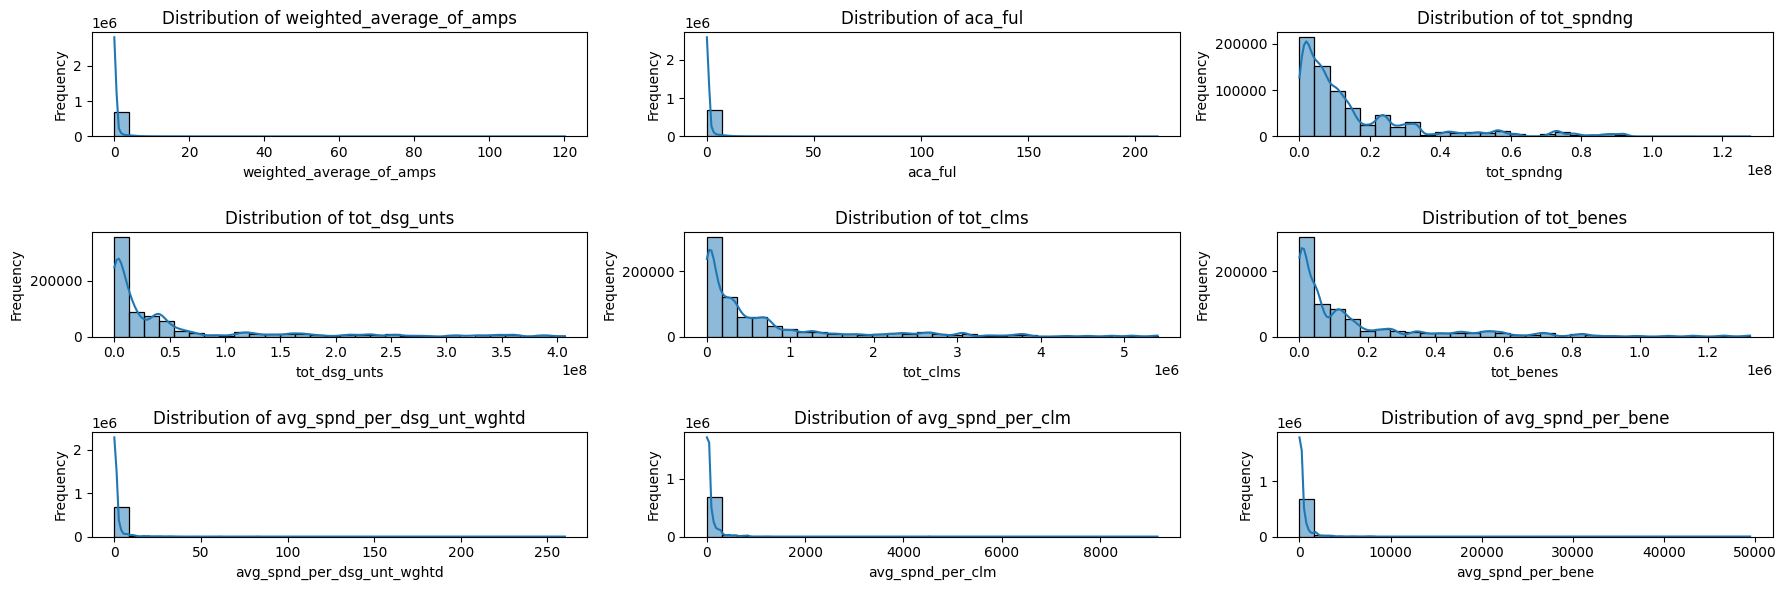

In [ ]:
# Set the plot size
plt.figure(figsize=(18, 6))

# Loop through each column and create a histogram and KDE plot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns, and i-th subplot
    sns.histplot(eda_data[column], kde=True, bins=30)  # kde=True adds kernel density estimation curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

The data shows a right-skewed distribution, meaning most values are low, with a few very high values. This often happens in financial or manufacturing data. To improve the analysis, we can try using log transformations or handle outliers. This can help make the data more balanced and easier to work with.

<Figure size 1500x1200 with 0 Axes>

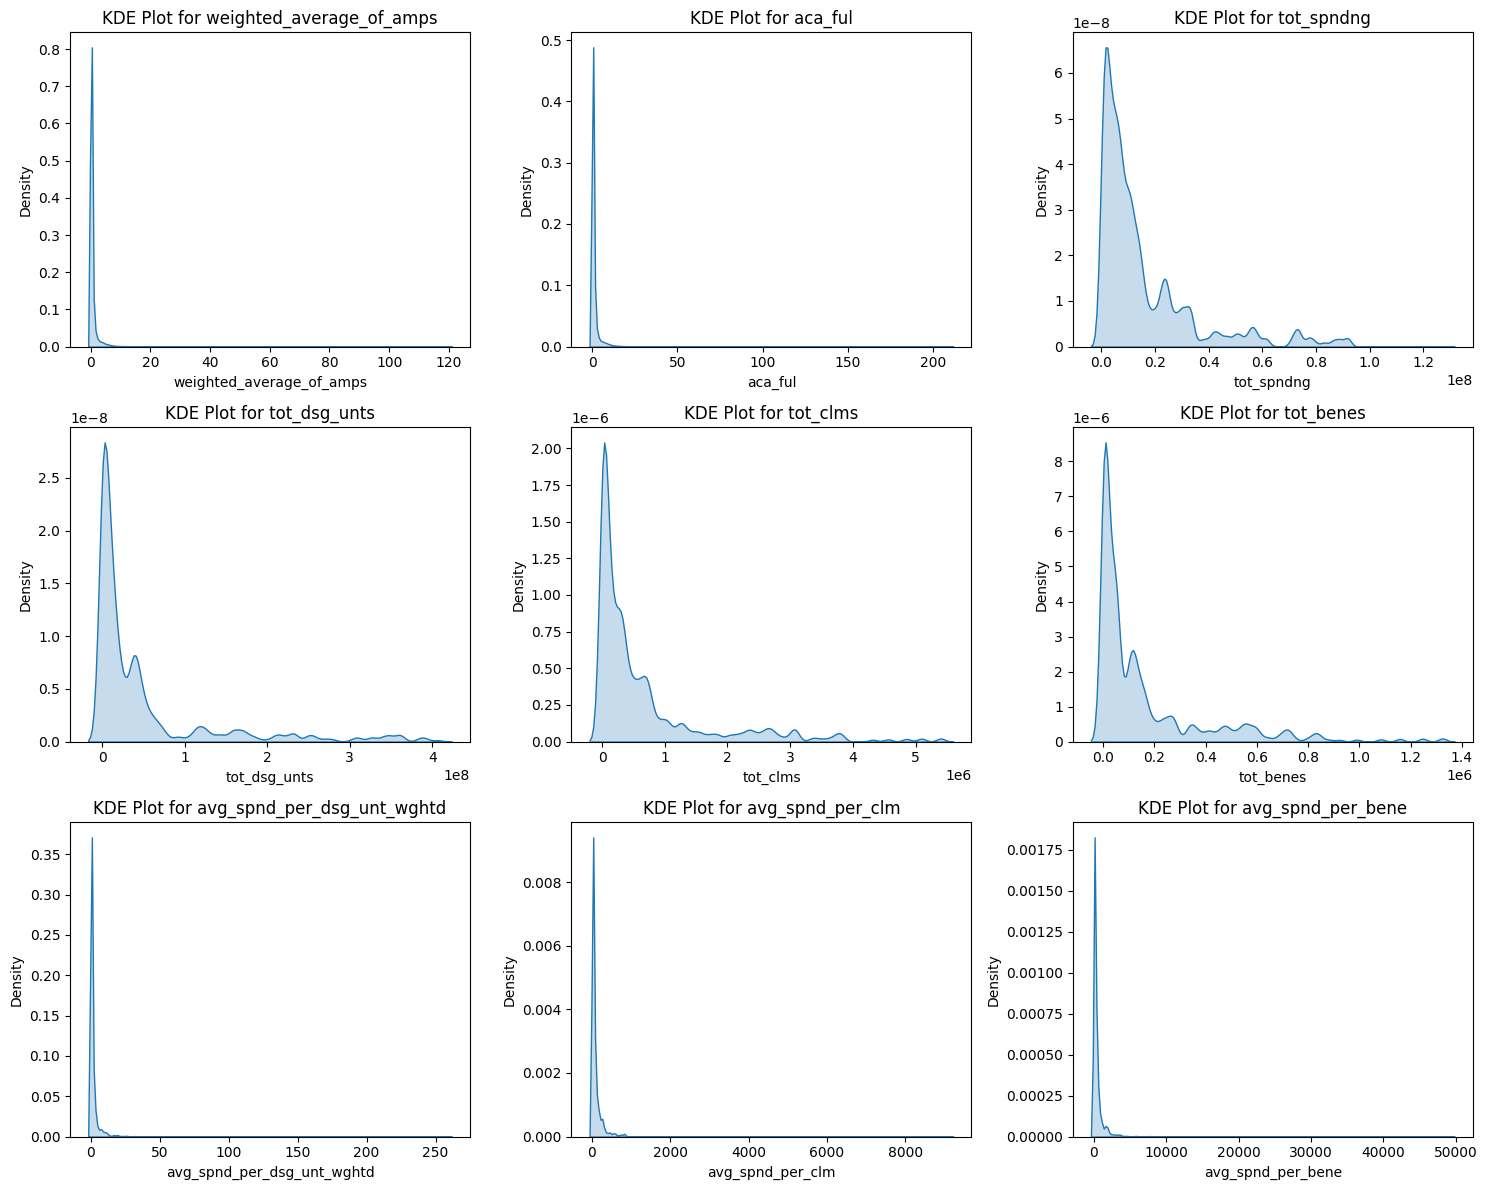

In [ ]:
# Set the plot size for the whole grid
plt.figure(figsize=(15, 12))

# Determine how many rows and columns you need
n_cols = 3  # 3 columns in each row
n_rows = (len(columns_to_plot) // n_cols) + (1 if len(columns_to_plot) % n_cols != 0 else 0)

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# Flatten axes to make it easier to iterate over
axes = axes.flatten()

# Loop through each column and create a KDE plot
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(eda_data[column], shade=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Density")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The KDE plots show some peaks, which suggest that certain values are more common in specific ranges. This might mean that drugs or spending categories are behaving similarly in certain ways. To understand this better, we could use clustering to group similar drugs or spending patterns, which would help us see any hidden trends more clearly.










### Relationships with Target (Scatterplots)

In [ ]:
# List of continuous features
continuous_features = ['aca_ful', 'package_size', 'year', 'month', 'tot_mftr',
                       'tot_spndng', 'tot_clms', 'tot_benes', 'tot_dsg_unts',
                       'avg_spnd_per_dsg_unt_wghtd', 'avg_spnd_per_clm', 'avg_spnd_per_bene']

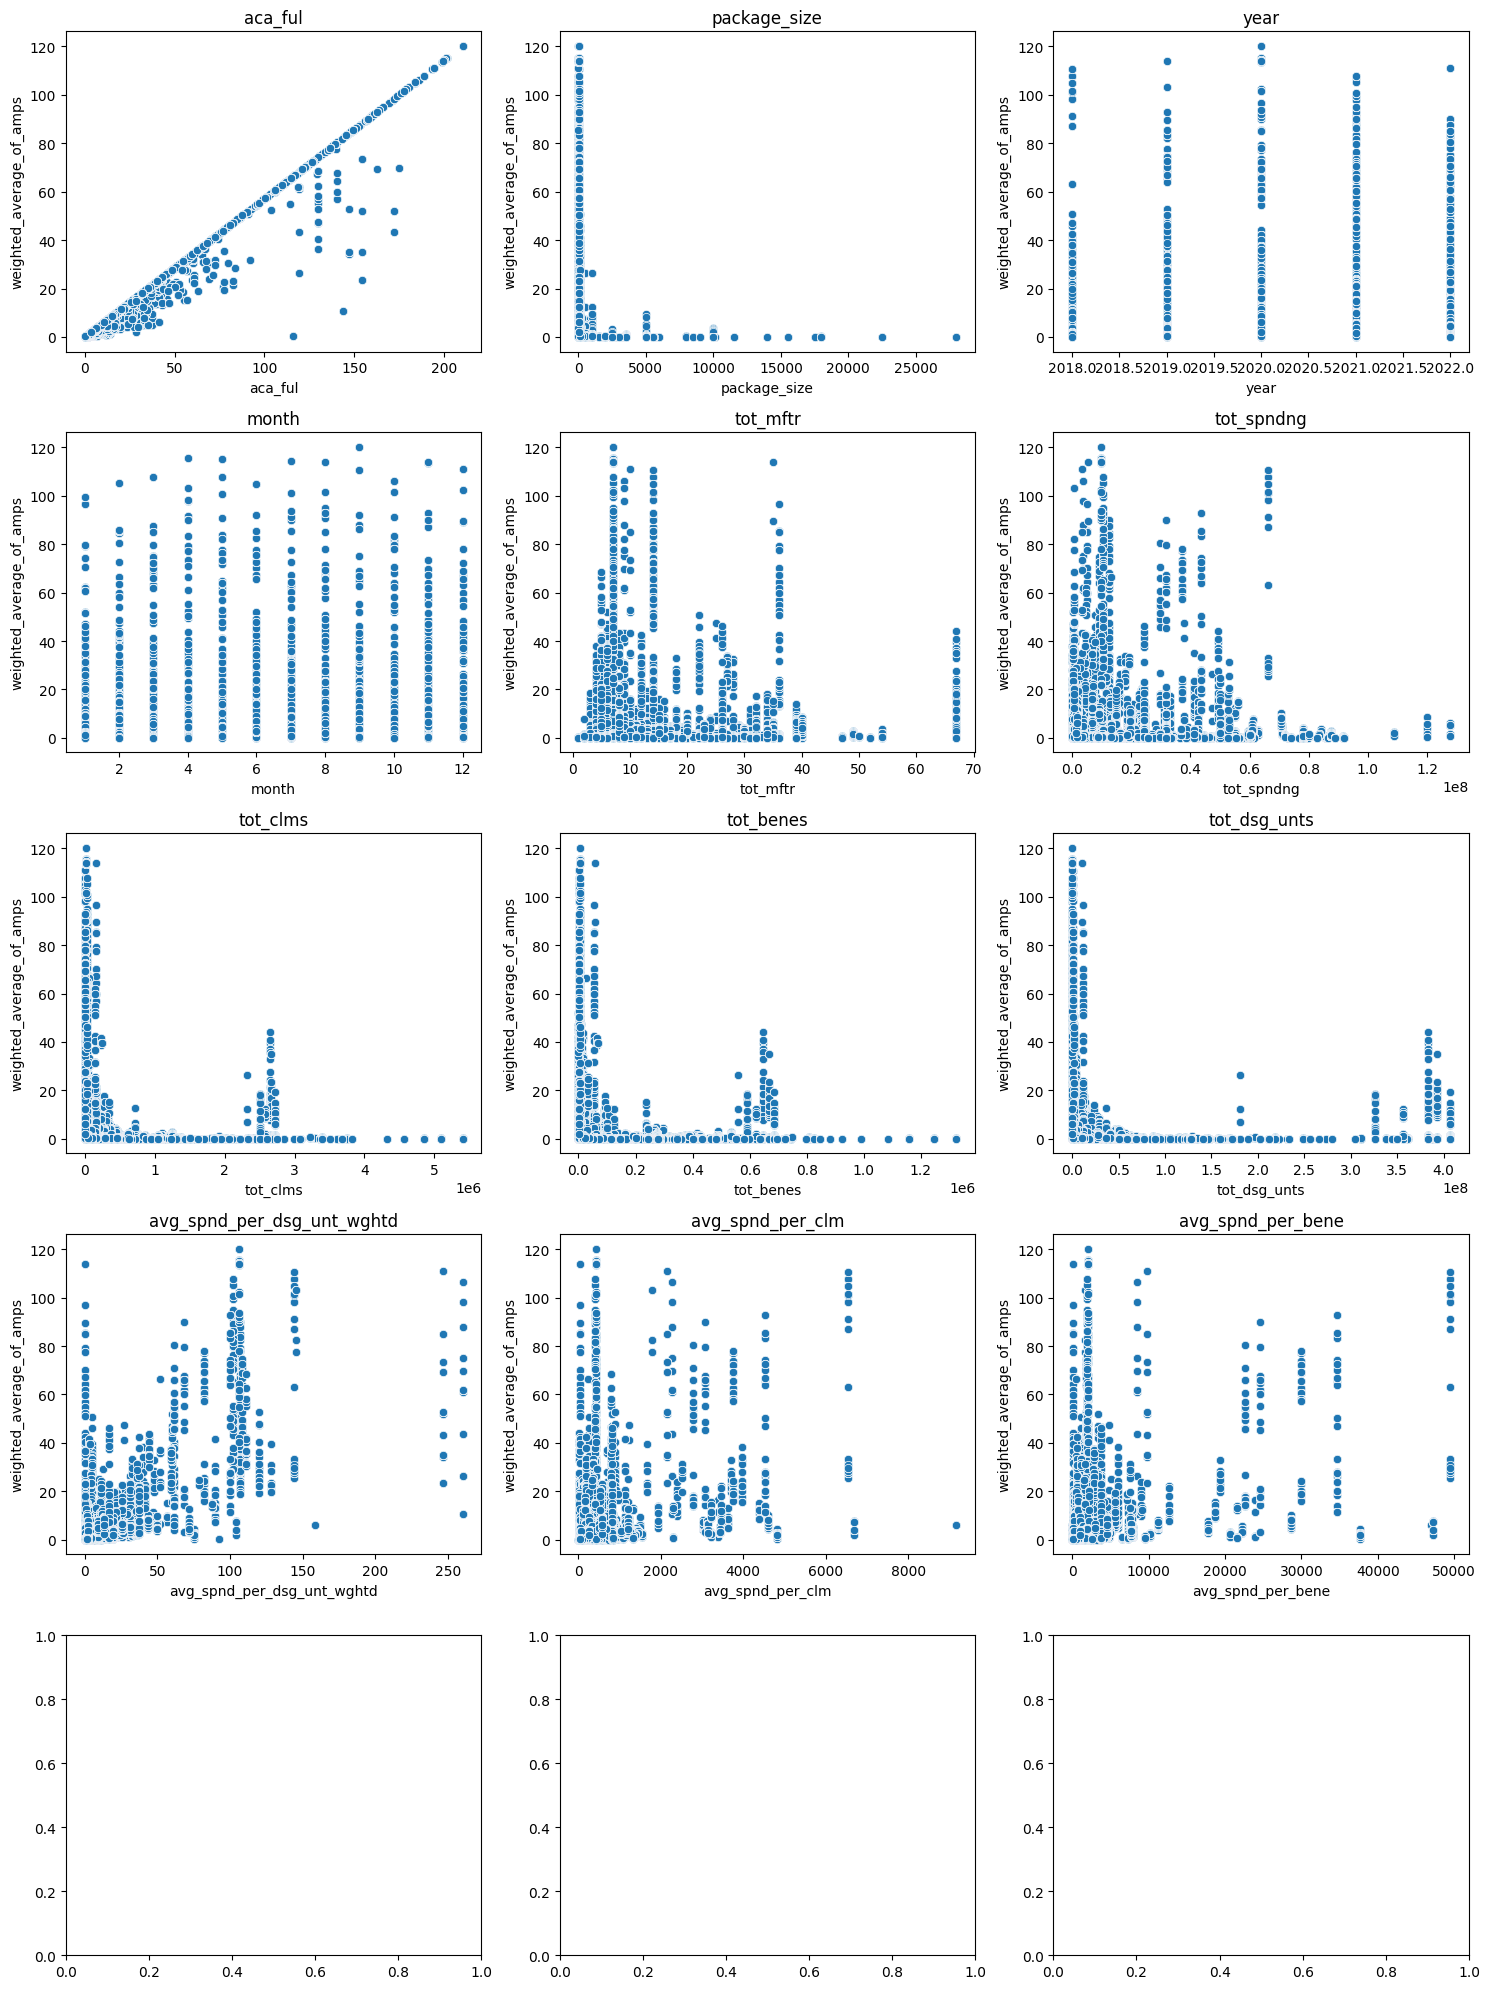

In [ ]:
# Target variable
target_column = "weighted_average_of_amps"

# Set up the plotting grid (3 plots per row)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.ravel()

# Loop through the continuous features and create scatterplots
for i, feature in enumerate(continuous_features):
    sns.scatterplot(x=eda_data[feature], y=eda_data[target_column], ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

We analyzed how each feature relates to our target variable. If the relationship is not linear, we might create new polynomial features to better capture patterns. Features showing step changes may benefit from grouping values into ranges (binning), and clumped values might suggest underlying categories we can explore further.

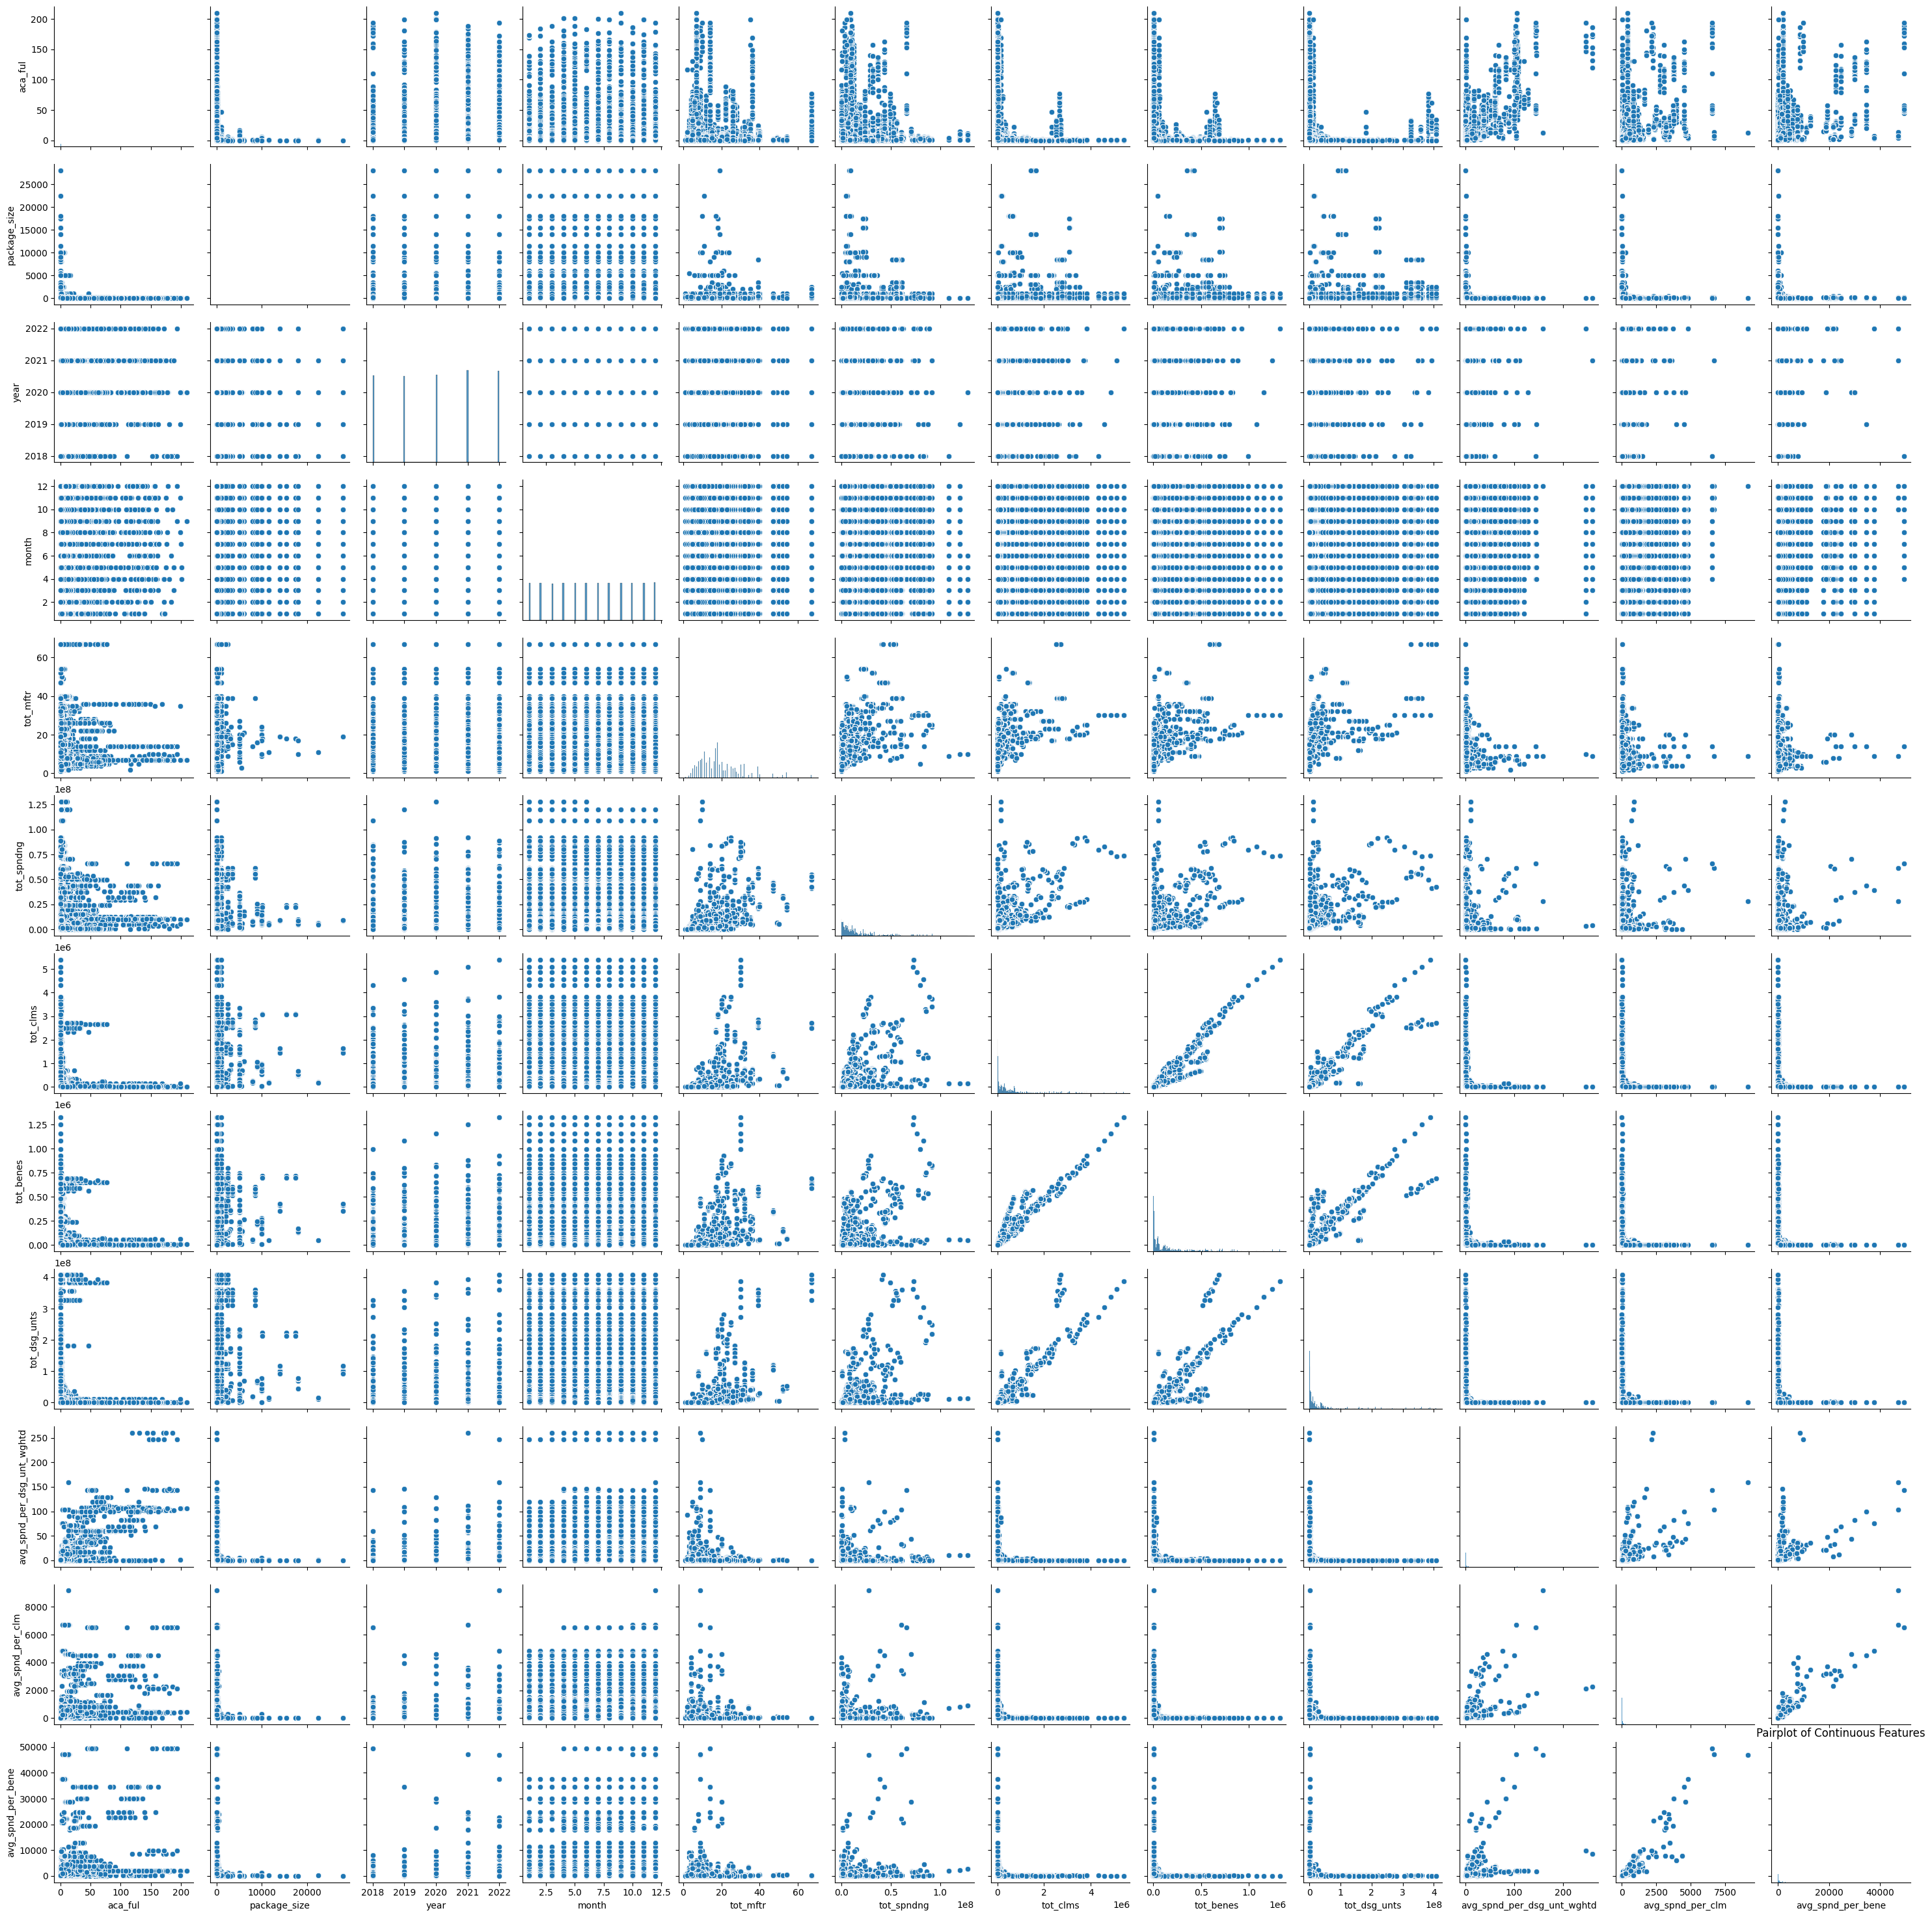

In [ ]:
# Pairplot for all continuous features
sns.pairplot(eda_data[continuous_features])
plt.title('Pairplot of Continuous Features')
plt.show()

### Check for outliers

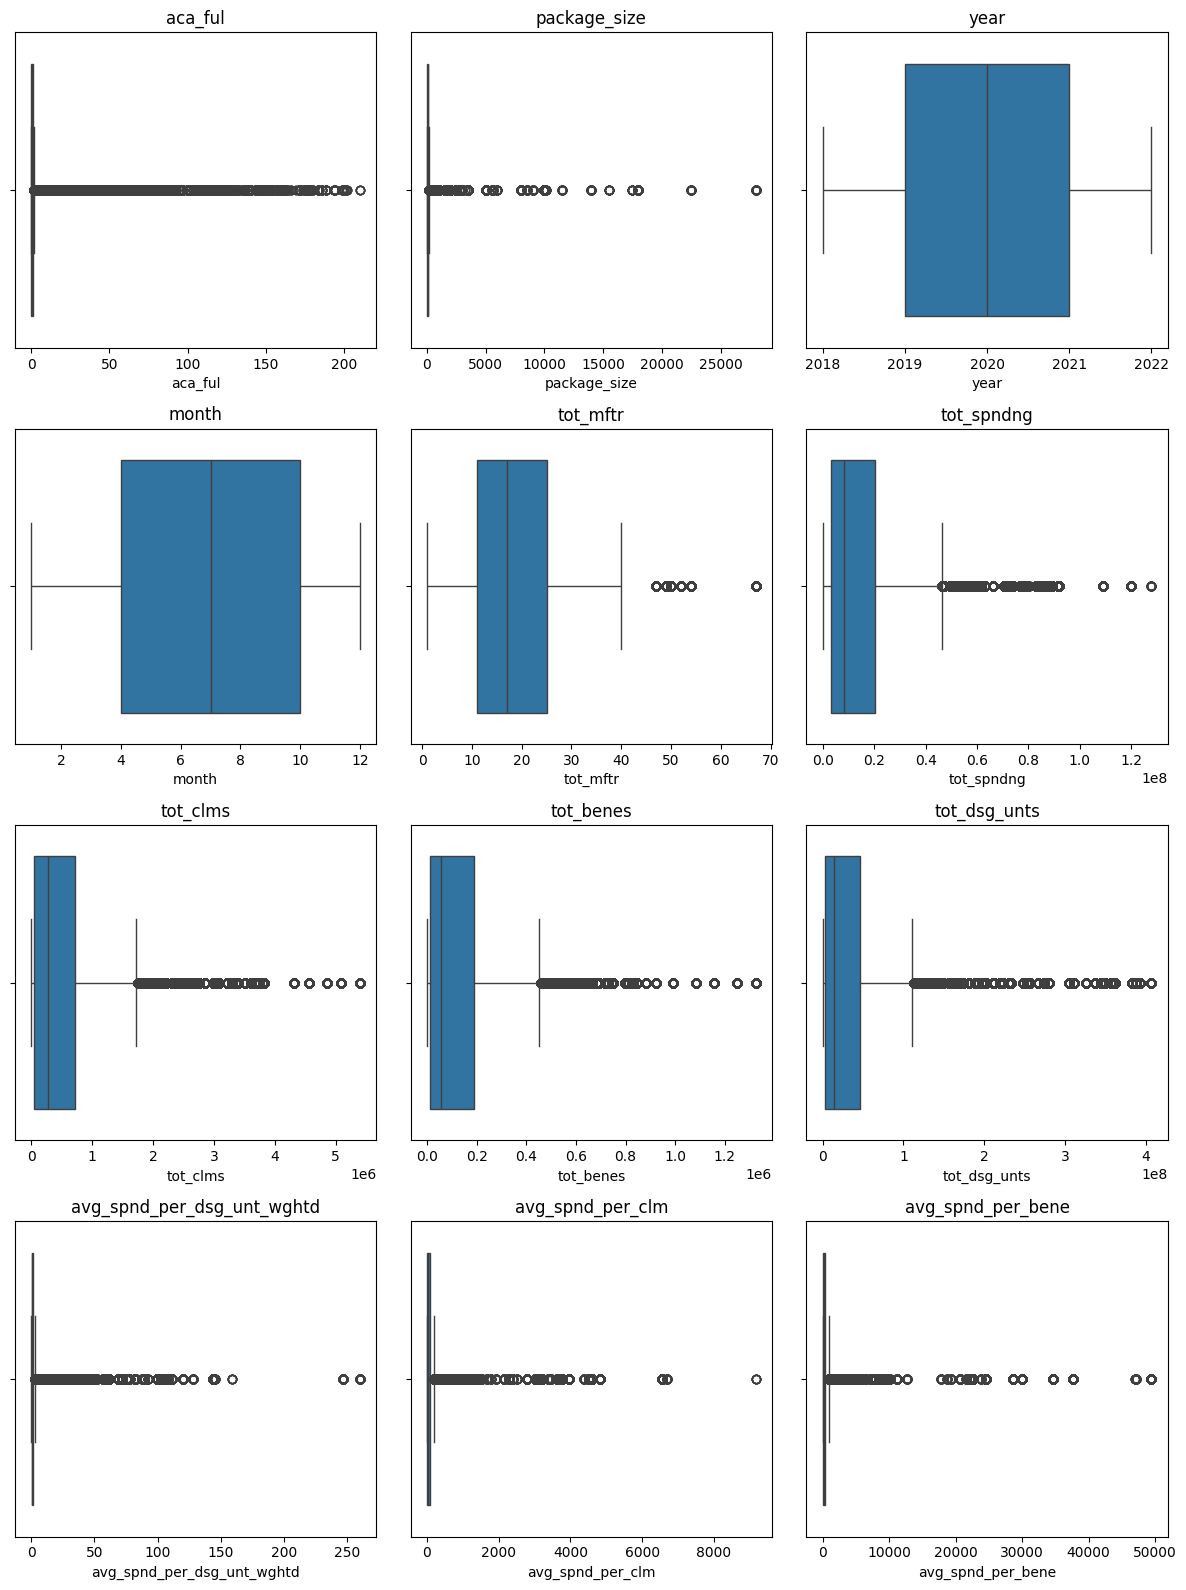

In [ ]:
# Calculate number of rows and columns needed for the subplots
num_features = len(continuous_features)
num_cols = 3  # Number of columns in the plot grid
num_rows = math.ceil(num_features / num_cols)  # Number of rows needed

# Set up the figure size
plt.figure(figsize=(12, 4 * num_rows))

# Loop through the features to create boxplots
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=eda_data[feature])
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

## Feature Engineering

We're transforming the `month` feature using sine and cosine to help the model understand that months follow a cycle, where January comes after December, rather than treating them as unrelated numbers.

In [ ]:
# Apply sine and cosine transformations to 'month' to capture the cyclical nature
eda_data['month_sin'] = np.sin(2 * np.pi * eda_data['month'] / 12)
eda_data['month_cos'] = np.cos(2 * np.pi * eda_data['month'] / 12)

### Polynomial Features

In [ ]:
# Create interaction features to capture combined effects of supply, demand, and cost

# Feature 1: Supply-side cost influence
eda_data['tot_mftr_avg_spnd_per_bene'] = (
    eda_data['tot_mftr'] * eda_data['avg_spnd_per_bene']
)

# Feature 2: Market reach or supply-demand scale
eda_data['tot_mftr_tot_benes'] = (
    eda_data['tot_mftr'] * eda_data['tot_benes']
)

# Feature 3: Care intensity or compounding cost burden
eda_data['avg_spnd_per_clm_avg_spnd_per_bene'] = (
    eda_data['avg_spnd_per_clm'] * eda_data['avg_spnd_per_bene']
)

# Feature 4: Average dosage units per claim — reflects intensity of treatment per service
eda_data['avg_dsg_units_per_clm'] = (
    eda_data['tot_dsg_unts'] / eda_data['tot_clms']
).replace(0, np.nan)

# Feature 5: Utilization rate — average dosage units used per beneficiary
eda_data['utilization_rate'] = (
    eda_data['tot_dsg_unts'] / eda_data['tot_benes']
).replace(0, np.nan)

# Round all new features to 4 decimal places
eda_data['tot_mftr_avg_spnd_per_bene'] = eda_data['tot_mftr_avg_spnd_per_bene'].round(4)
eda_data['tot_mftr_tot_benes'] = eda_data['tot_mftr_tot_benes'].round(4)
eda_data['avg_spnd_per_clm_avg_spnd_per_bene'] = eda_data['avg_spnd_per_clm_avg_spnd_per_bene'].round(4)
eda_data['avg_dsg_units_per_clm'] = eda_data['avg_dsg_units_per_clm'].round(4)
eda_data['utilization_rate'] = eda_data['utilization_rate'].round(4)


These interaction features help capture nonlinear relationships between supply, demand, and cost.
For instance:
- `tot_mftr` * `avg_spnd_per_bene` may reflect market-driven cost pressure.
- `tot_mftr` * `tot_benes` can indicate the scale of supply-demand reach.
- `avg_spnd_per_clm` * `avg_spnd_per_bene` highlights potential cost intensity or care burden.
- `avg_dsg_units_per_clm` represents the average number of dosage units used per claim, offering insight into treatment intensity per service.
- `utilization_rate` reflects average dosage usage per beneficiary, helping quantify how widely and intensively a product is used across the covered population.

Including these terms can improve model performance by exposing hidden patterns not captured by individual features.


### Feature Scaling

In [ ]:
# List of numerical columns (to be scaled)
numerical_columns = [
    'weighted_average_of_amps', 'aca_ful', 'package_size', 'strength_num',
    'strength_ratio', 'tot_mftr', 'tot_spndng', 'tot_clms', 'tot_benes',
    'tot_dsg_unts', 'avg_spnd_per_dsg_unt_wghtd', 'avg_spnd_per_clm',
    'avg_spnd_per_bene', 'tot_mftr_avg_spnd_per_bene', 'tot_mftr_tot_benes',
    'avg_spnd_per_clm_avg_spnd_per_bene', 'avg_dsg_units_per_clm', 'utilization_rate'
]

In [ ]:
# Apply scaling only to the numerical columns
scaler = RobustScaler()

# Scale the numerical columns and update the DataFrame
eda_data[numerical_columns] = scaler.fit_transform(eda_data[numerical_columns])

We scaled the numerical data using RobustScaler, which helps to reduce the impact of outliers. This makes the data more consistent and ready for further analysis.

## Feature Selection

In [ ]:
# Ensure corr_columns is a DataFrame by selecting the relevant columns
corr_columns = eda_data[
    [
        "tot_spndng",
        "tot_mftr",
        "tot_dsg_unts",
        "tot_clms",
        "tot_benes",
        "tot_mftr_tot_benes",
        "avg_spnd_per_dsg_unt_wghtd",
        "avg_spnd_per_clm",
        "avg_spnd_per_bene",
        "tot_mftr_avg_spnd_per_bene",
        "avg_spnd_per_clm_avg_spnd_per_bene",
        "aca_ful",
        "package_size",
        "avg_dsg_units_per_clm",
        "utilization_rate",
        "year",
        "month",
        "weighted_average_of_amps"
    ]
]

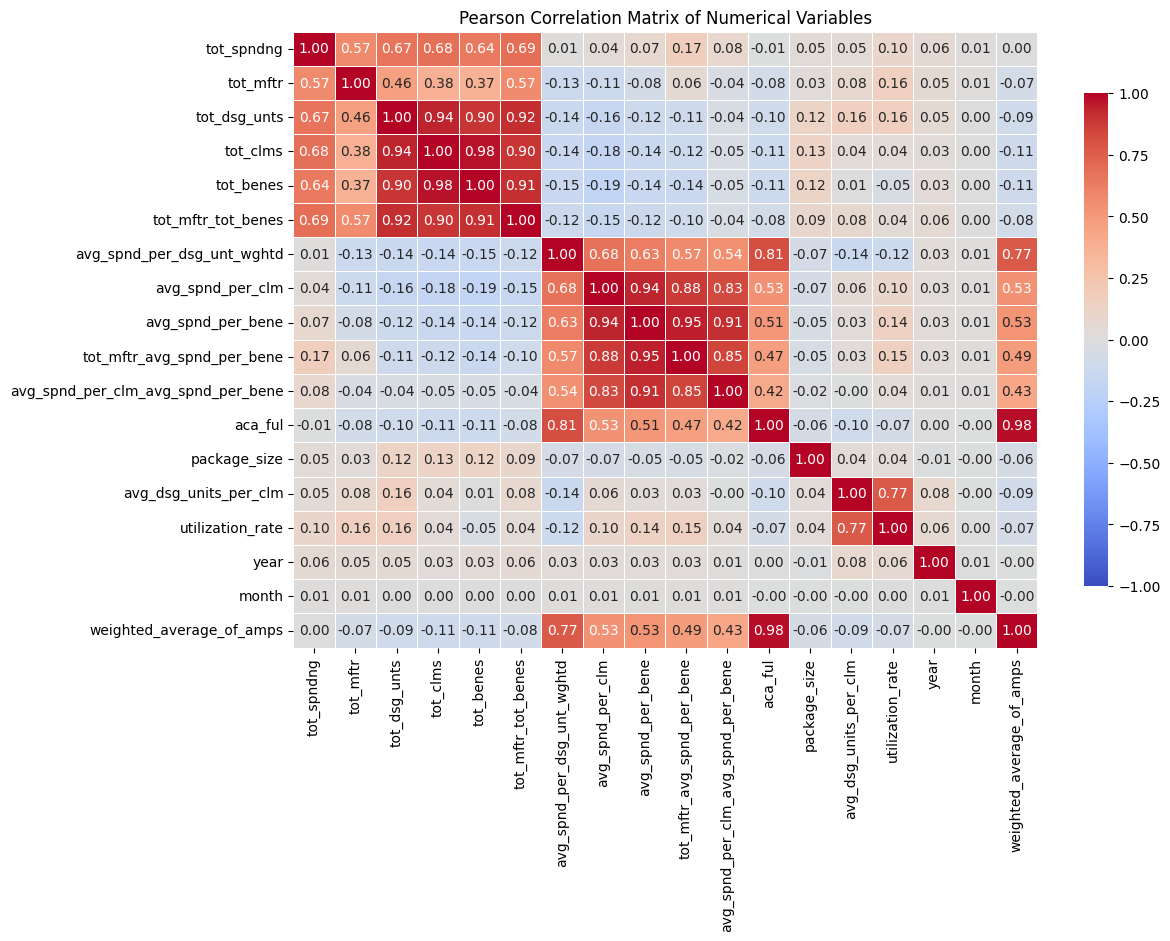

In [ ]:
# Calculate Pearson correlation matrix
pearson_corr_matrix = corr_columns.corr(method="pearson")

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the Pearson correlation matrix
sns.heatmap(
    pearson_corr_matrix,
    annot=True,  # Show correlation values on the heatmap
    cmap="coolwarm",  # Color map for the heatmap
    fmt=".2f",  # Format for correlation values
    linewidths=0.5,  # Line thickness between cells
    cbar_kws={"shrink": 0.8},  # Color bar options
    vmin=-1,
    vmax=1,  # Set min and max values for better contrast
)

# Set the title
plt.title("Pearson Correlation Matrix of Numerical Variables")

# Show the plot
plt.show()


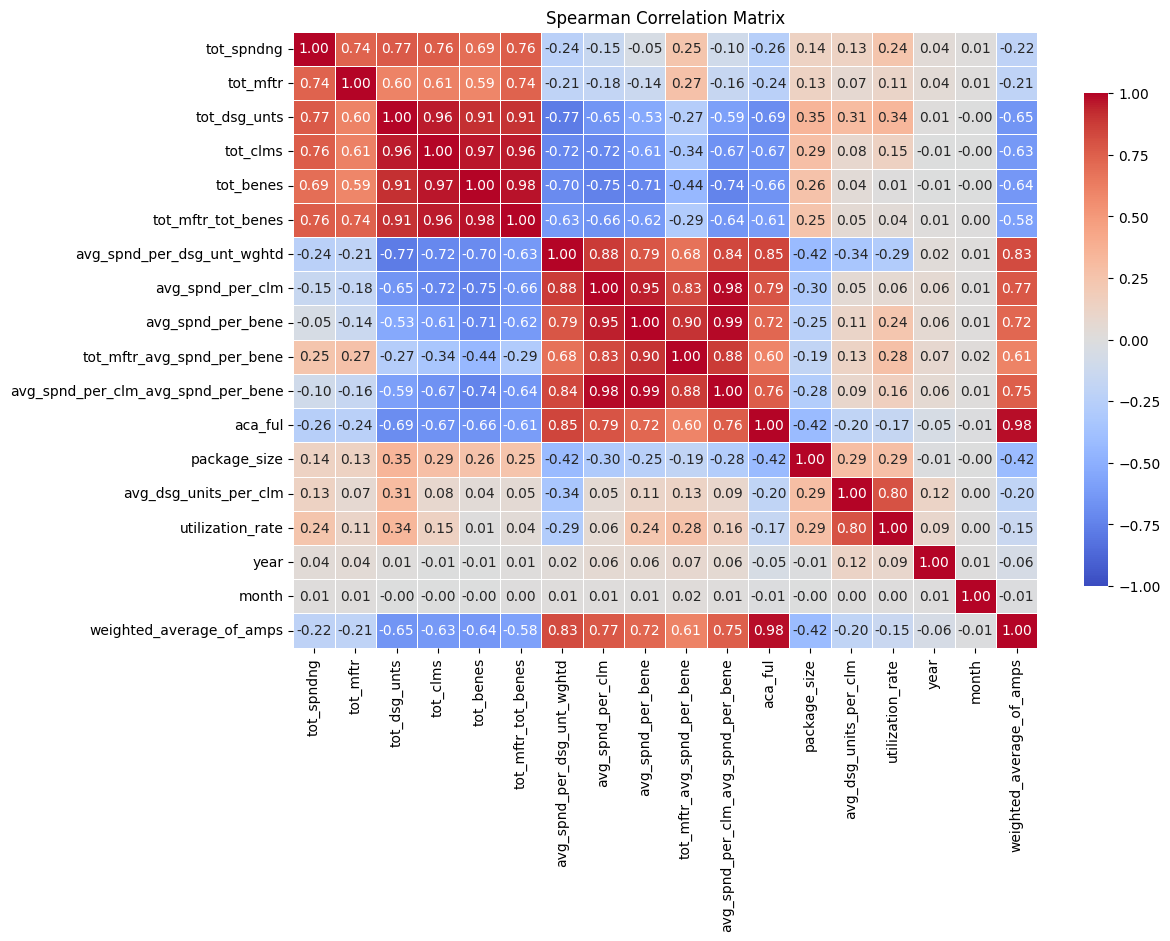

In [ ]:
# Calculate Spearman correlation matrix
spearman_corr_matrix = corr_columns.corr(method="spearman")

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap for Spearman correlation
sns.heatmap(
    spearman_corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
)

# Set title
plt.title("Spearman Correlation Matrix")

# Show plot
plt.show()

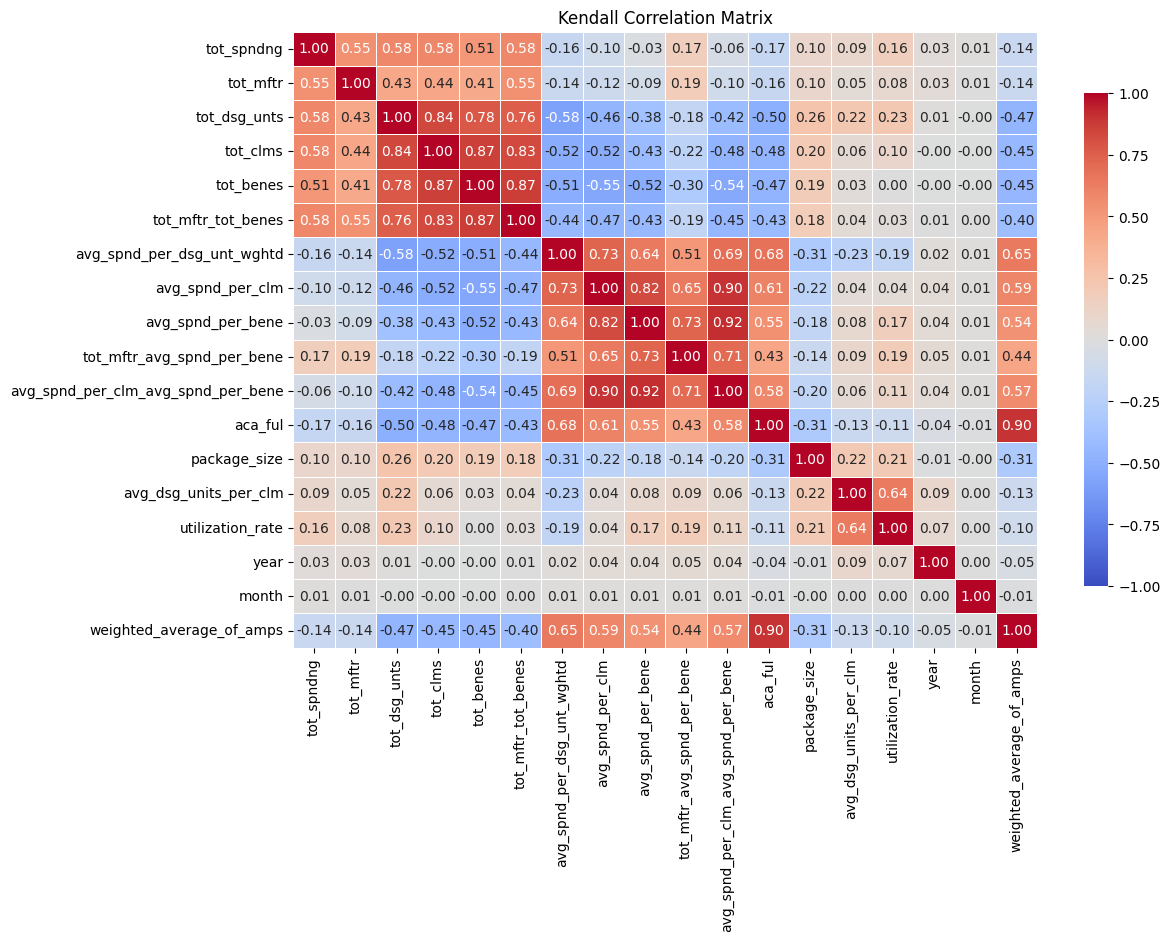

In [ ]:
# Calculate Kendall correlation matrix
kendall_corr_matrix = corr_columns.corr(method="kendall")

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap for Kendall correlation
sns.heatmap(
    kendall_corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1,
)

# Set title
plt.title("Kendall Correlation Matrix")

# Show plot
plt.show()

We chose these features for analysis after checking how closely they are related to the target variable **`weighted_average_of_amps`**:

- **avg_dsg_units_per_clm**
- **avg_spnd_per_bene**
- **tot_mftr**
- **tot_spndng**
- **utilization_rate**
- **tot_clms**
- **avg_spnd_per_clm**
- **tot_mftr_avg_spnd_per_bene**
- **package_size**

We also made sure that these features don't overlap too much (no multicollinearity) by looking at their correlations using different methods.

## Final Dataset

In [ ]:
model_drug_amp = eda_data.copy()

In [ ]:
# Define the path to save the CSV file
repo_path = r"C:\Users\shiri\OneDrive\Documents\Python\ml-projects\data-606\pharmaceutical-drug-price-prediction"
save_path = os.path.join(repo_path, "data", "processed")

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save the dataset as a CSV file
csv_file_path = os.path.join(save_path, "model_drug_amp.csv")
model_drug_amp.to_csv(csv_file_path, index=False)

print(f"Dataset saved successfully at: {csv_file_path}")

Dataset saved successfully at: /content/drive/My Drive/DATA_606/data/model_drug_amp.csv
